# Разведочный анализ данных: Data Cleaning. Практическая работа

## Цели практической работы
* Потренироваться выявлять и заполнять пропущенные значения в данных.
* Потренироваться преобразовывать типы данных.
* Потренироваться выявлять и обрабатывать аномальные значения в данных.
* Подготовить датафрейм к этапу генерации признаков.



## Задача

В этой практической работе вы продолжите исследовать и готовить данные для этапа моделирования: заполнять пропущенные значения в некоторых переменных, изменять типы данных и обрабатывать выбросы.

Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите заполнять пропущенные значения в некоторых переменных, измените типы данных и обработаете выбросы.



## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Исследовать переменные датасета на наличие пропусков.
3. Обработать пропуски в зависимости от типа переменной.
4. Изменить типы данных.
5. Исследовать данные на аномальные значения и скорректировать выбросы.

## Критерии оценки работы
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них уроках.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.




## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему куратору.

### Обязательные задачи

In [1]:
import missingno as msno
# Импорт необходимых библиотек
import numpy as np
import pandas as pd

### Задача 1. Загрузка датасета и ознакомление с количеством пропущенных значений

1. Загрузите датасет из `data/df_out.csv` и выведите первые пять записей.



In [2]:
# Загружаем dataSet из файла csv. Посмотрим на корретность загрузки.
df = pd.read_csv('data/df_out.csv', sep=',')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Выведите информацию о датафрейме и обратите внимание на оставшиеся незаполненные значения.


In [3]:
# Смотрим размер dataSet-а
print('Размер выборки: {}, {}'.format(df.shape[0], df.shape[1]))


Размер выборки: 9902, 20


In [4]:
# Посмотрим описательную статистику
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9902 entries, 0 to 9901
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9902 non-null   int64  
 1   url             9902 non-null   object 
 2   region          9902 non-null   object 
 3   region_url      9902 non-null   object 
 4   price           9902 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9902 non-null   object 
 7   model           9776 non-null   object 
 8   fuel            9841 non-null   object 
 9   odometer        9902 non-null   int64  
 10  title_status    9738 non-null   object 
 11  transmission    9902 non-null   object 
 12  image_url       9902 non-null   object 
 13  description     9902 non-null   object 
 14  state           9902 non-null   object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9902 non-null   o

In [5]:
# Посмотрим описательную статистику
print(df.describe())

                 id         price         year       odometer          lat  \
count  9.902000e+03  9.902000e+03  9868.000000    9902.000000  9902.000000   
mean   7.311556e+09  2.068420e+04  2010.909708   93385.043123    38.594142   
std    4.361977e+06  1.252344e+05     9.705988   63337.141614     5.844895   
min    7.301586e+09  5.000000e+02  1915.000000       0.000000   -67.144243   
25%    7.308184e+09  7.880000e+03  2008.000000   39003.250000    34.830368   
50%    7.312775e+09  1.559250e+04  2013.000000   89000.000000    39.298522   
75%    7.315285e+09  2.799000e+04  2017.000000  137000.000000    42.428070   
max    7.317090e+09  1.234568e+07  2022.000000  283995.000000    64.947500   

              long  
count  9902.000000  
mean    -94.165877  
std      18.128504  
min    -158.069300  
25%    -110.322086  
50%     -88.000050  
75%     -80.830000  
max     173.885502  


3. Выведите количество полностью заполненных объектов и их процент из всей выборки. Воспользуйтесь материалами из видео.


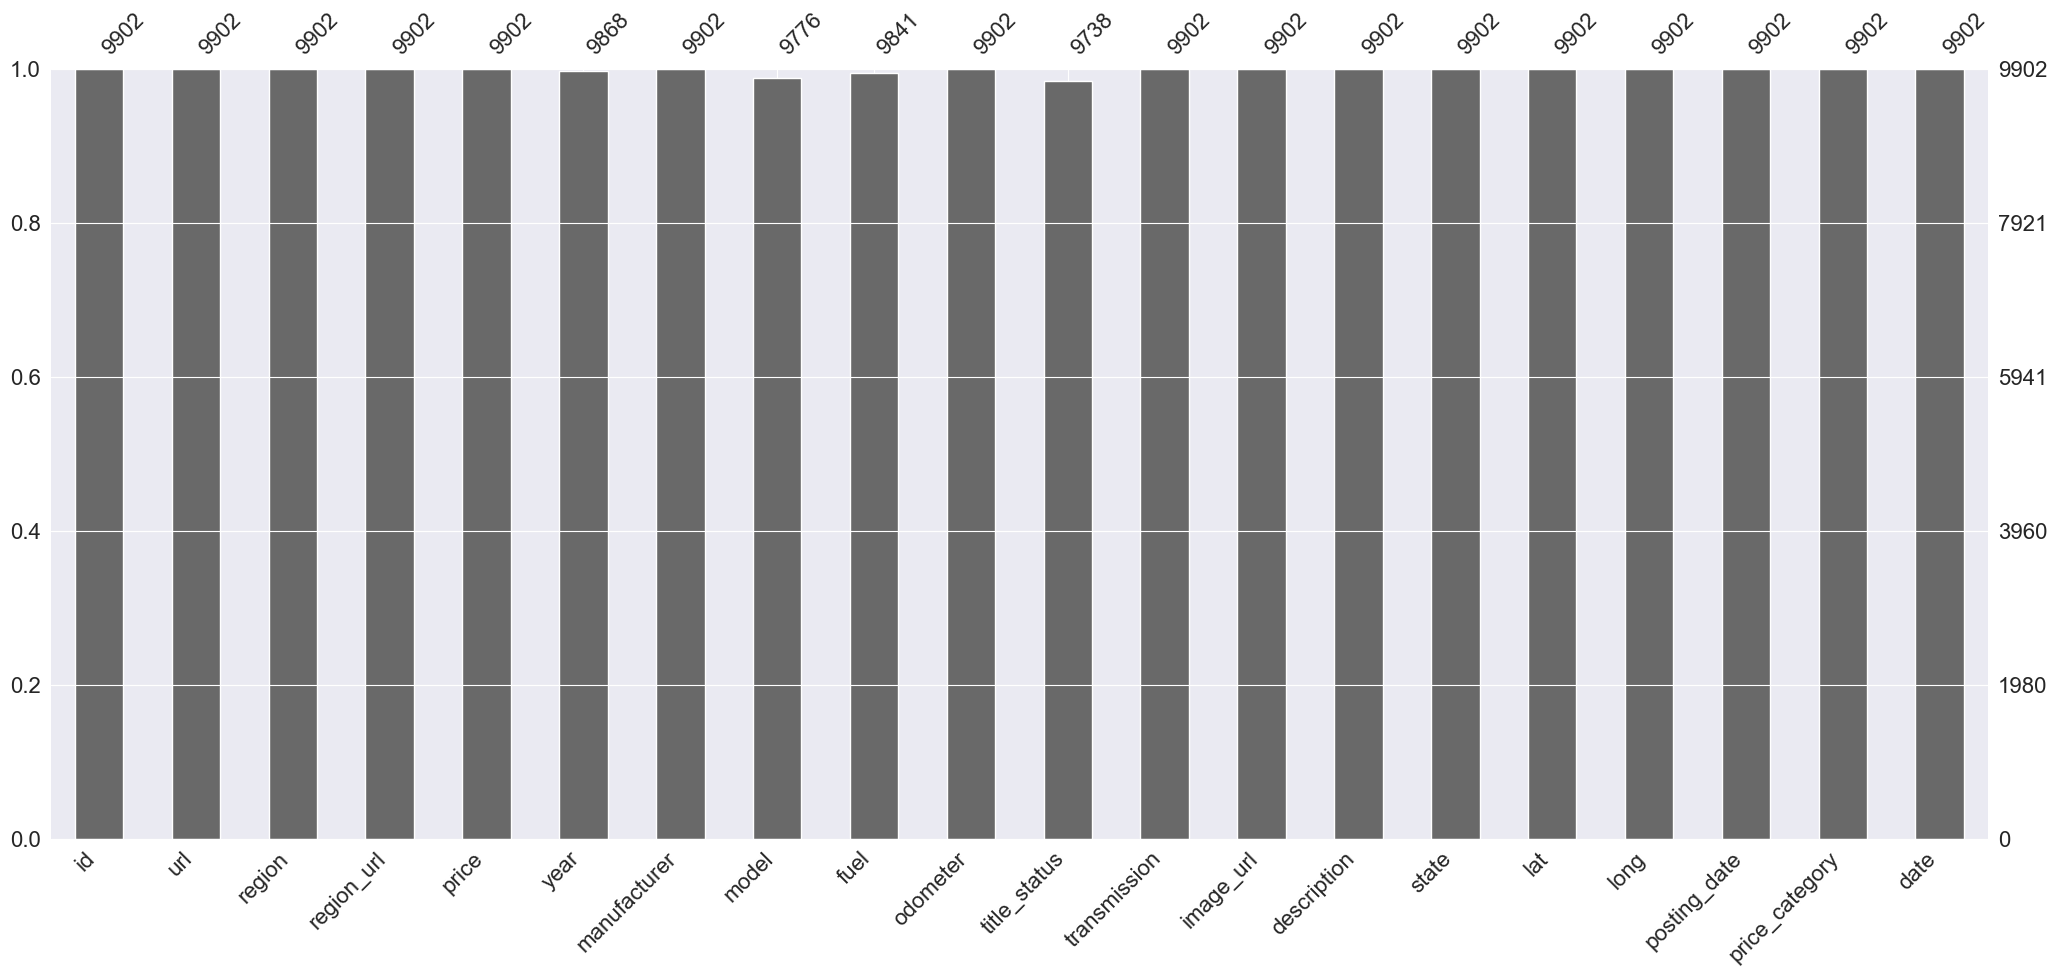

In [6]:
# Проверим заполнение данных и узнаем их % от всей выборки
msno.bar(df);

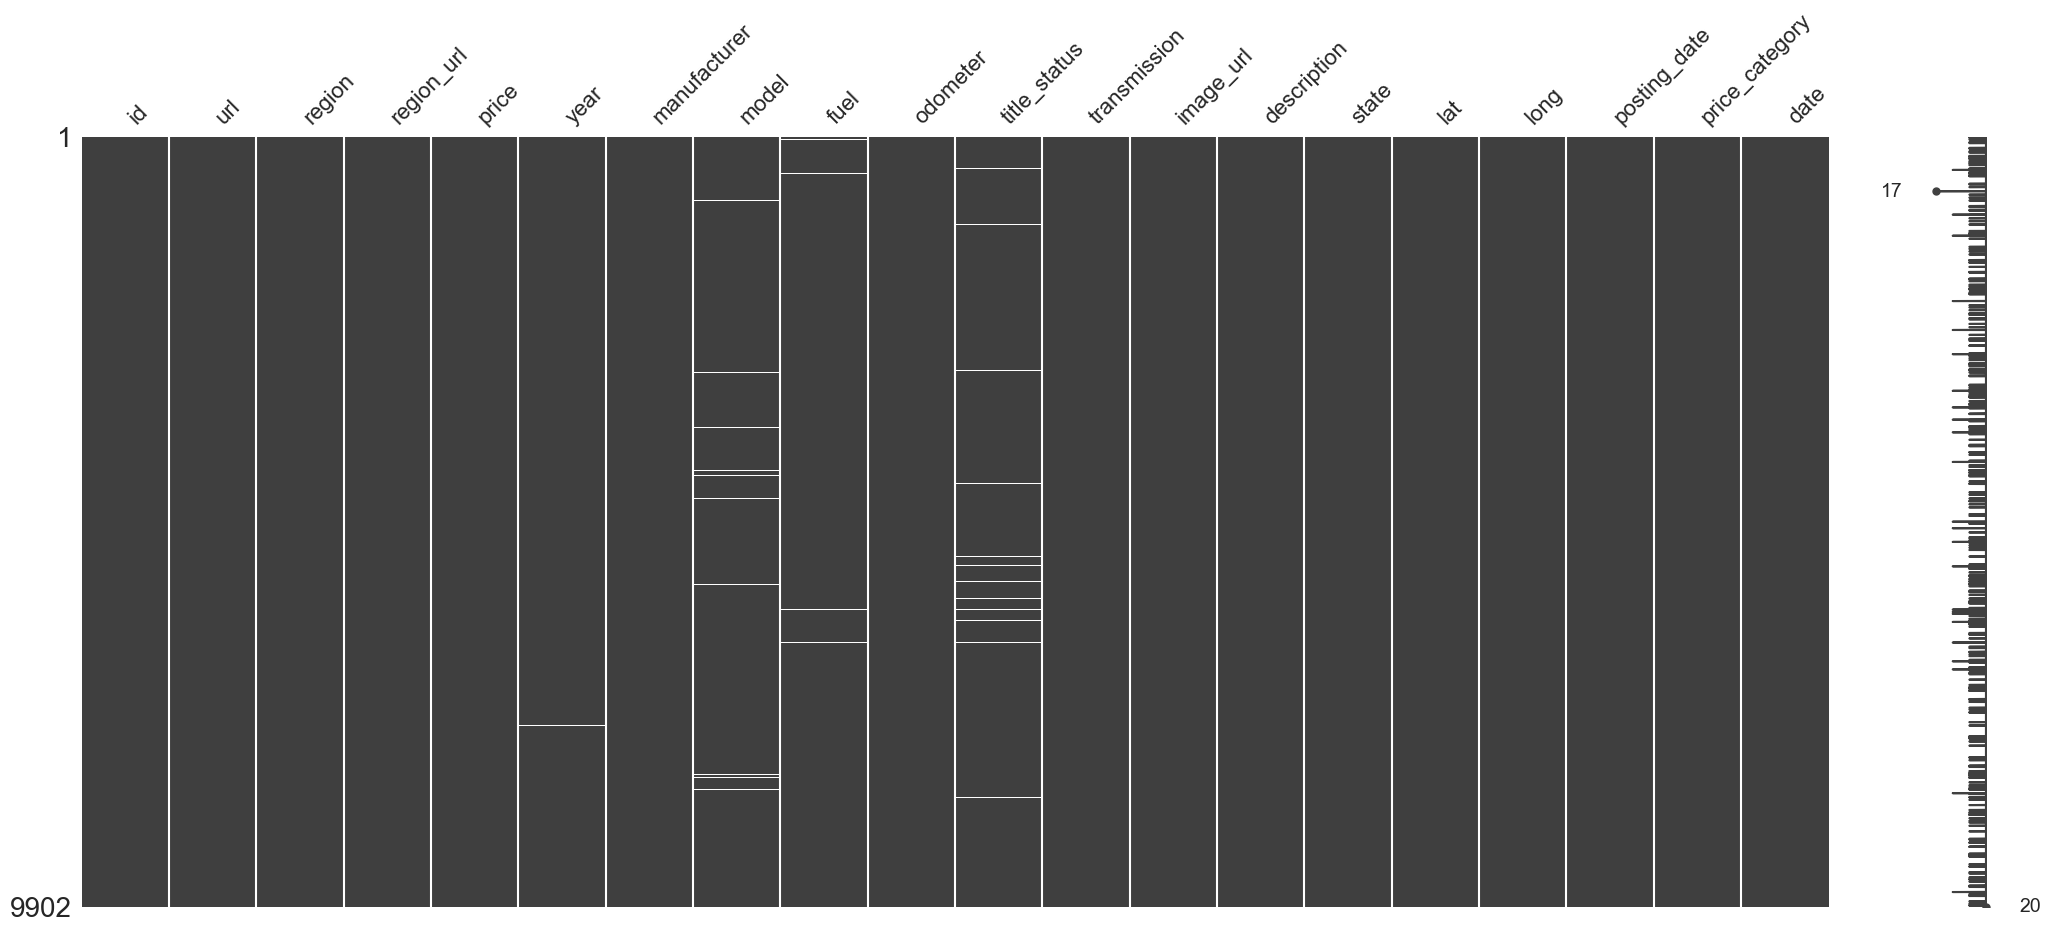

In [7]:
msno.matrix(df);

In [8]:
#Kоличество полностью заполненных объектов и их процент из всей выборки
def print_useful_rows_info(df):
    print('Kоличество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('% полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))

In [9]:
print_useful_rows_info(df)

Kоличество полностью заполненных объектов из всей выборки: 9543
% полностью заполненных объектов из всей выборки: 96.37


4. Сохраните в переменную и выведите процент пропущенных значений для каждого признака, отсортируйте признаки по убыванию процента пропущенных значений. Воспользуйтесь материалами из видео и не забудьте передать верный параметр сортировки.


In [10]:
#процент пропущенных значений для каждого признака
missing_value = ((df.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_value

Процент пропущенных значений:


id                0.000000
posting_date      0.000000
long              0.000000
lat               0.000000
state             0.000000
description       0.000000
image_url         0.000000
transmission      0.000000
price_category    0.000000
odometer          0.000000
manufacturer      0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
date              0.000000
year              0.343365
fuel              0.616037
model             1.272470
title_status      1.656231
dtype: float64

5. Выведите список всех признаков, в которых имеются пропущенные значения. Воспользуйтесь результатом вывода предыдущего задания, чтобы отсортировать признаки, подходящие под условие.

In [11]:
#Список всех признаков, в которых имеются пропущенные значения
print(missing_value.index[missing_value.values > 0].values)

['year' 'fuel' 'model' 'title_status']


### Задача 2. Обработка пропусков в годе выпуска автомобиля

1. Выведите количество значений для года выпуска автомобиля, включая пропущенные значения.


In [12]:
#Количество значений для года выпуска автомобиля
df.year.value_counts(dropna=False)

2017.0    808
2018.0    799
2016.0    733
2013.0    685
2015.0    664
         ... 
1927.0      1
1958.0      1
1941.0      1
1935.0      1
1954.0      1
Name: year, Length: 90, dtype: int64

2. Выведите количество пропущенных значений в годе выпуска автомобиля.



In [13]:
#Количество пропущенных значений в годе выпуска автомобиля
print('Количество пропущенных значений в годе выпуска автомобиля:', df.year.isna().sum())
print('% пропущенных значений в годе выпуска автомобиля:', round((df.year.isna().sum() / df.year.count() * 100), 2),
      '%')

Количество пропущенных значений в годе выпуска автомобиля: 34
% пропущенных значений в годе выпуска автомобиля: 0.34 %


3. Выведите описательные статистики для года выпуска автомобиля.


In [14]:
#Описательные статистики для года выпуска автомобиля
df.year.describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

4. Выведите записи, в которых год выпуска автомобиля не заполнен. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


In [15]:
# Записи, в которых год выпуска автомобиля не заполнен
df[df['year'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
342,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
418,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
423,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
697,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
887,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
900,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
998,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1208,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1308,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1828,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


5. Обработайте пропуски, удалив записи, в которых год выпуска автомобиля не заполнен, и сохраните обновлённый датафрейм, а затем выведите его размерность.

In [16]:
# Удалим строки с пропущенными значениями в поле year. Результат запишим в новый DataSet
df_clean = df.copy()
df_clean = df[df.year.isna() == False]
df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


***Год можно восстановить из описания.***

6. Выведите количество пропущенных значений в годе выпуска автомобиля для обновлённого датафрейма.

In [17]:
# Допишите код
print("Количество пропущенных значений в year:", df_clean.year.isna().sum())

Количество пропущенных значений в year: 0


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9901
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9868 non-null   int64  
 1   url             9868 non-null   object 
 2   region          9868 non-null   object 
 3   region_url      9868 non-null   object 
 4   price           9868 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9868 non-null   object 
 7   model           9742 non-null   object 
 8   fuel            9814 non-null   object 
 9   odometer        9868 non-null   int64  
 10  title_status    9709 non-null   object 
 11  transmission    9868 non-null   object 
 12  image_url       9868 non-null   object 
 13  description     9868 non-null   object 
 14  state           9868 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9868 non-null   o

### Задача 3. Задача 3. Обработка пропусков в типе топлива

1. Выведите количество значений для типа топлива, включая пропущенные значения. Обратите внимание на количество пропущенных значений.




In [19]:
#Количество значений для типа топлива, включая пропущенные значения
df_clean.fuel.value_counts(dropna=False)

gas         8298
other        725
diesel       643
hybrid       104
NaN           54
electric      44
Name: fuel, dtype: int64

2. Выведите описательные статистики для типа топлива.


In [20]:
#Описательные статистики для типа топлива
df_clean.fuel.describe()

count     9814
unique       5
top        gas
freq      8298
Name: fuel, dtype: object

3. Выведите записи, в которых тип топлива не заполнен. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


In [21]:
#Записи, в которых тип топлива не заполнен
df_clean[df_clean.fuel.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,193242,clean,automatic,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low,2021-04-20 17:40:15+00:00
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,79522,clean,automatic,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high,2021-04-29 22:15:30+00:00
273,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,10679,clean,automatic,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high,2021-05-01 01:50:19+00:00
469,7316807613,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,13436,2006.0,chevrolet,"silverado 1500 ext cab 143.5"" wb 4wd ls",NaN,172700,clean,automatic,https://images.craigslist.org/00l0l_35tV0gQdD8...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-05-04T10:20:19-0700,medium,2021-05-04 17:20:19+00:00
1002,7314561306,https://cnj.craigslist.org/ctd/d/parlin-2000-c...,central NJ,https://cnj.craigslist.org,5894,2000.0,chevrolet,"s-10 ext cab 123"" wb ls",NaN,78740,clean,automatic,https://images.craigslist.org/00O0O_8vd70bT1rY...,***Call Us for more information at: 732-316-55...,nj,40.468650,-74.296990,2021-04-29T18:20:19-0400,low,2021-04-29 22:20:19+00:00
1269,7310297136,https://westernmass.craigslist.org/ctd/d/johns...,western massachusetts,https://westernmass.craigslist.org,6000,2008.0,other,IC IC,NaN,0,NaN,automatic,https://images.craigslist.org/00404_cBFpBKbfr2...,"2008 *IC* *IC* CE300 - $6,000Call Us Today! 85...",ma,43.008105,-74.352011,2021-04-21T10:11:05-0400,low,2021-04-21 14:11:05+00:00
1307,7310414739,https://nwct.craigslist.org/ctd/d/melville-200...,northwest CT,https://nwct.craigslist.org,11995,2007.0,gmc,c-7500 multiple uses perfect,NaN,50098,clean,automatic,https://images.craigslist.org/00T0T_jvsOAKSGAr...,2007 *GMC* *C-7500 MULTIPLE USES PERFECT* FOR ...,ct,40.681179,-73.430488,2021-04-21T13:18:41-0400,medium,2021-04-21 17:18:41+00:00
1670,7316342709,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,19942,2017.0,ram,"promaster cargo van 1500 low roof 118"" wb",NaN,88836,clean,automatic,https://images.craigslist.org/00707_6ZlIIpYmGf...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T14:40:24-0400,medium,2021-05-03 18:40:24+00:00
1830,7315151536,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29988,2019.0,toyota,sienna le fwd 8-passenger (natl),NaN,18762,clean,automatic,https://images.craigslist.org/00R0R_dO0gtiRwLa...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T16:25:22-1000,high,2021-05-01 02:25:22+00:00


4. Обработайте пропуски, заполнив незаполненные значения типа топлива значением `other`, и сохраните изменения. Обратите внимание, что мы заполняем пропуски не самым популярным значением в выборке.


In [22]:
#Заполним незаполненные значения типа топлива значением other, и сохраните изменения
df_clean.fuel = df_clean.fuel.fillna('other')

D:\Users\garri\AppData\Local\Temp\ipykernel_9112\3560162845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.fuel = df_clean.fuel.fillna('other')


5. Выведите для обновлённого датафрейма количество пропущенных значений для типа топлива.

In [23]:
# Допишите код
print("Количество пропущенных значений в fuel:", df_clean.fuel.isna().sum())

Количество пропущенных значений в fuel: 0


### Задача 4. Обработка пропусков в модели автомобиля

1. Выведите количество значений для модели автомобиля, включая пропущенные значения. Обратите внимание на количество пропущенных значений.



In [24]:
#Количество значений для модели автомобиля, включая пропущенные
df_clean.model.value_counts(dropna=False)

f-150                        148
NaN                          126
silverado 1500               106
1500                         100
camry                         76
                            ... 
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
a3 2.0t premium plus pzev      1
Name: model, Length: 3438, dtype: int64

2. Выведите описательные статистики для модели автомобиля.


In [25]:
#Описательные статистики для модели автомобиля
df_clean.model.describe()

count      9742
unique     3437
top       f-150
freq        148
Name: model, dtype: object

3. Выведите записи, в которых модель автомобиля не заполнена. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


In [26]:
#Записи, в которых модель автомобиля не заполнена
df_clean[df_clean.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
140,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
149,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
198,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
249,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9469,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,gas,85285,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low,2021-04-29 15:50:54+00:00
9521,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,gas,73082,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium,2021-04-09 20:24:23+00:00
9573,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,gas,52536,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low,2021-04-20 08:48:30+00:00
9828,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00


In [27]:
df_clean[df_clean.model.isna()][['model', 'description']]

,model,description
67,NaN,2005 Range Rover HSE Changed Oil and now engi...
140,NaN,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...
149,NaN,2007 gmc with plow leather loaded nice truck r...
198,NaN,2012 RAM 1500 Laramie Crew Cab 2WD Offered...
249,NaN,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...
...,...,...
9469,NaN,Toyota has been owned by non smoker with no pe...
9521,NaN,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...
9573,NaN,GMC Savana PRO AWD cargo van has been driven l...
9828,NaN,"2017 Range Rover HSE, supercharged V8, silver ..."


4. Если подробнее изучить значения описания автомобиля, то, возможно, модель автомобиля получится восстановить из описания. Сейчас же обработайте пропуски, заполнив незаполненные значения модели автомобиля значением `other`, и сохраните изменения. Обратите внимание, что мы в очередной раз заполняем пропуски не самым популярным значением в выборке.


In [28]:
#Обработка пропусков, заполним незаполненные значения модели автомобиля значением other, и сохраним изменения
df_clean.model = df_clean.model.fillna('other')

D:\Users\garri\AppData\Local\Temp\ipykernel_9112\392751983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.model = df_clean.model.fillna('other')


5. Выведите для обновлённого датафрейма количество пропущенных значений для модели автомобиля.

In [29]:
# Допишите код
print("Количество пропущенных значений в model:", df_clean.model.isna().sum())

Количество пропущенных значений в model: 0


### Задача 5. Обработка пропусков в статусе автомобиля

1. Выведите количество значений для статуса автомобиля, включая пропущенные значения. Обратите внимание на количество пропущенных значений.


In [30]:
#Количество значений для статуса автомобиля, включая пропущенные значения
df_clean.title_status.value_counts(dropna=False)

clean         9397
rebuilt        168
NaN            159
salvage         91
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

2. Выведите описательные статистики для модели автомобиля.



In [31]:
#Описательные статистики для модели автомобиля
df_clean.title_status.describe()

count      9709
unique        6
top       clean
freq       9397
Name: title_status, dtype: object

3. Выведите записи, в которых статус автомобиля не заполнен. Посмотрите на данные и подумайте, какую стратегию обработки значений можно применить.


In [32]:
#Записи, в которых статус автомобиля не заполнен
df_clean[df_clean.title_status.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
185,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,gas,145499,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium,2021-04-27 22:03:47+00:00
243,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
284,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,gas,268691,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low,2021-04-14 16:03:01+00:00
310,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,gas,66049,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium,2021-04-16 11:06:29+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,gas,203112,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low,2021-04-04 17:12:27+00:00
9708,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,other,95674,NaN,other,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00
9743,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,gas,70800,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium,2021-04-30 20:00:48+00:00
9759,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006.0,lexus,gx 470,gas,242000,NaN,automatic,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium,2021-04-20 12:01:49+00:00


4. Обработайте пропуски, заполнив незаполненные значения статуса автомобиля самым популярным значением, и сохраните изменения. Самое популярное значение передайте не в виде строки, а получите моду.


In [33]:
#Заполним незаполненные значения статуса автомобиля самым популярным значением, и сохраните изменения
title_status_mode = df_clean.title_status.mode()[0]
df_clean.title_status = df_clean.title_status.fillna(title_status_mode)

D:\Users\garri\AppData\Local\Temp\ipykernel_9112\2977281592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.title_status = df_clean.title_status.fillna(title_status_mode)


5. Выведите для обновлённого датафрейма количество пропущенных значений для статуса автомобиля.


In [34]:
# Допишите код
print("Количество пропущенных значений в title_status:", df_clean.title_status.isna().sum())

Количество пропущенных значений в title_status: 0


6. Ещё раз выведите количество полностью заполненных объектов и их процент из всей выборки. После обработки всех пропусков можно переходить к следующему этапу.

In [35]:
#Количество полностью заполненных объектов и их процент из всей выборки. После обработки всех пропусков
print_useful_rows_info(df_clean)

Kоличество полностью заполненных объектов из всей выборки: 9868
% полностью заполненных объектов из всей выборки: 100.0


### Задача 6. Преобразование типа данных в годе выпуска автомобиля
1.  Выведите информацию о датафрейме и обратите внимание на типы данных.


In [36]:
#Информацию о датафрейме
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9901
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9868 non-null   int64  
 1   url             9868 non-null   object 
 2   region          9868 non-null   object 
 3   region_url      9868 non-null   object 
 4   price           9868 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9868 non-null   object 
 7   model           9868 non-null   object 
 8   fuel            9868 non-null   object 
 9   odometer        9868 non-null   int64  
 10  title_status    9868 non-null   object 
 11  transmission    9868 non-null   object 
 12  image_url       9868 non-null   object 
 13  description     9868 non-null   object 
 14  state           9868 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9868 non-null   o

2. Выведите описательные статистики для года выпуска автомобиля. Обратите внимание на тип данных.



In [37]:
#Описательные статистики для года выпуска автомобиля
df_clean['year'].describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [38]:
#Тип данных в поле year
df_clean['year'].dtype

dtype('float64')

3. Измените тип данных для года выпуска на более подходящий целочисленный тип и выведите получившийся тип данных только для года выпуска.

In [39]:
#Изменим тип данных для года выпуска на более подходящий целочисленный тип
df_clean.year = df_clean.year.astype(int)

D:\Users\garri\AppData\Local\Temp\ipykernel_9112\3245659212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.year = df_clean.year.astype(int)


In [40]:
#Проверим результат
df_clean['year'].dtype

dtype('int32')

### Задача 7. Преобразование типа данных в категориальных переменных

1. Выведите тип данных для типа топлива автомобиля.


In [41]:
#Тип данных для типа топлива автомобиля
df_clean.fuel.values.dtype

dtype('O')

2. Категориальным переменным можно задавать специальный тип данных `category`. Подробнее об этом можно прочитать в [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html). Укажите для типа топлива тип данных `category`, сохраните изменения в переменную `series` и выведите её.


In [42]:
#Зададим специальный тип данных category
df_clean.fuel = df_clean.fuel.astype("category")

D:\Users\garri\AppData\Local\Temp\ipykernel_9112\3263790415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.fuel = df_clean.fuel.astype("category")


3. Выведите тип данных для серии. Обратите внимание на структуру вывода.

In [43]:
df_clean.dtypes

id                   int64
url                 object
region              object
region_url          object
price                int64
year                 int32
manufacturer        object
model               object
fuel              category
odometer             int64
title_status        object
transmission        object
image_url           object
description         object
state               object
lat                float64
long               float64
posting_date        object
price_category      object
date                object
dtype: object

In [44]:
#Выведем тип данных для серии
series = df_clean.fuel.dtype
series

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False)

4. Выведите первые две категории, используя вывод типа данных выше.

In [45]:
#Первые две категории
series.categories[:2].to_list()

['diesel', 'electric']

### Задача 8. Выбросы в годе выпуска

1. Выведите описательные статистики для года выпуска автомобиля. Обратите внимание на пограничные значения, на квартили.



In [46]:
#Описательные статистики для года выпуска автомобиля
df_clean.year.describe().apply(lambda x: f"{x:0.3f}")

count    9868.000
mean     2010.910
std         9.706
min      1915.000
25%      2008.000
50%      2013.000
75%      2017.000
max      2022.000
Name: year, dtype: object

2. Выведите границы для нормальных значений года выпуска, используя интерквартильный размах. Воспользуйтесь материалами из видео. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.


In [47]:
#Создадим функцию для подсчета интерквартильного размаха
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [48]:
#Выведем границы с помощью нашей функции.
boundaries = calculate_outliers(df_clean.year)
boundaries

(1994.5, 2030.5)

3. Посчитайте и выведите количество выбросов в годе выпуска автомобиля.


In [49]:
#Количество выбросов в годе выпуска автомобиля
is_outlier = (df_clean.year < int(boundaries[0])) | (df_clean.year > int(boundaries[1]))
is_outlier.sum()

367

4. Посчитайте и выведите долю выбросов в годе выпуска автомобиля.


In [50]:
#Доля выбросов в годе выпуска автомобиля
print("Доля выбросов в годе выпуска автомобиля", round(is_outlier.sum() / len(df_clean), 2))
print("% выбросов в годе выпуска автомобиля", round(is_outlier.sum() / len(df_clean), 2) * 100)

Доля выбросов в годе выпуска автомобиля 0.04
% выбросов в годе выпуска автомобиля 4.0


5. Выведите записи, в которых год выпуска попадает в выбросы. Посмотрите на данные и подумайте, могут ли эти выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.


In [51]:
#Записи, в которых год выпуска попадает в выбросы
df_clean[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high,2021-04-25 15:10:43+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high,2021-04-29 17:49:29+00:00
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990,other,Diahatsu,gas,30000,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20T18:30:18-0400,low,2021-04-20 22:30:18+00:00
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500,1968,chevrolet,camaro,gas,43320,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29T15:11:01-0600,high,2021-04-29 21:11:01+00:00
143,7316938454,https://duluth.craigslist.org/cto/d/calumet-83...,duluth / superior,https://duluth.craigslist.org,4000,1983,chevrolet,c10 short box,gas,0,clean,automatic,https://images.craigslist.org/00P0P_6I2TfYDHbN...,Arizona project started. new 350 4 bolt main ...,mn,47.394400,-93.246200,2021-05-04T15:55:58-0500,low,2021-05-04 20:55:58+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9762,7316395713,https://seattle.craigslist.org/see/ctd/d/sherm...,seattle-tacoma,https://seattle.craigslist.org,35500,1965,pontiac,gto,gas,61009,clean,manual,https://images.craigslist.org/00C0C_k6h7Uzc55e...,1965 Pontiac GTO. VIN: 237375P248569. True GTO...,wa,33.637200,-96.618400,2021-05-03T13:06:11-0700,high,2021-05-03 20:06:11+00:00
9789,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500,1974,jeep,cj5,gas,10000,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27T14:30:28-0500,low,2021-04-27 19:30:28+00:00
9846,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500,1984,chevrolet,silverado,gas,38751,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-27T19:44:27-0700,high,2021-04-28 02:44:27+00:00
9874,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500,1972,chevrolet,other,gas,75000,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03T14:58:34-0700,medium,2021-05-03 21:58:34+00:00


6. Выведите количество значений для категории цены для записей, в которых год выпуска автомобиля является выбросом. Описывают ли аномальные значения года выпуска какое-либо из значений цены автомобиля лучше, чем остальные?


In [52]:
#Количество значений для категории цены для записей, в которых год выпуска автомобиля является выбросом
df_clean.price_category[is_outlier].value_counts()

low       162
medium    129
high       76
Name: price_category, dtype: int64

7. Так как выбросы в годе выпуска находятся среди минимальных значений, заполните те значения, которые являются выбросами, значением нижней границы. Не забудьте учесть, что год должен быть целочисленным значением, входящим в границы нормальных значений.


In [53]:
#Так как выбросы в годе выпуска находятся среди минимальных значений, заполните те значения, которые являются выбросами, значением нижней границы
df_clean.loc[is_outlier, 'year'] = int(boundaries[0])

In [54]:
#Ещё раз описательные статистики для года выпуска автомобиля. Проверка
df_clean.year.describe().apply(lambda x: f"{x:0.3f}")

count    9868.000
mean     2011.658
std         6.531
min      1994.000
25%      2008.000
50%      2013.000
75%      2017.000
max      2022.000
Name: year, dtype: object

In [55]:
calculate_outliers(df_clean.year)

(1994.5, 2030.5)

### Дополнительные задачи

### Задача 9. Загрузка датафрейма с параметрами преобразования

Некоторые преобразования признаков можно сделать ещё в момент загрузки датафрейма из файла.

1. Прочитайте в новый датафрейм файл ` data/vehicles_dataset.csv`, выбрав только нужные колонки и применив приведение типов данных. Обратитесь к [документации](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), чтобы узнать, за что отвечают параметры `usecols`,  `parse_dates` и `dtype`.


Датафрейм должен содержать:
- колонки `price`, `year`, `posting_date`;
- `posting_date` в datatime-формате;
- `price` в вещественном формате;
- `year` в целочисленном формате.




In [56]:
# Загружаем dataSet из файла csv файла с приведением типов данных. Посмотрим на корретность загрузки.
df = pd.read_csv('data/vehicles_dataset.csv', sep=',', usecols=['price', 'year', 'posting_date'],
                 dtype={'price': np.float, 'year': np.int}, parse_dates=['posting_date'], infer_datetime_format=True)

D:\Users\garri\AppData\Local\Temp\ipykernel_9112\2815709651.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype={'price': np.float, 'year': np.int}, parse_dates=['posting_date'], infer_datetime_format=True)
D:\Users\garri\AppData\Local\Temp\ipykernel_9112\2815709651.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1

ValueError: cannot safely convert passed user dtype of int32 for float64 dtyped data in column 5

In [ ]:
#Возникла ошибка. Загрузим без изменения типов
df = pd.read_csv('data/vehicles_dataset.csv', sep=',', usecols=['price', 'year', 'posting_date'])
#Выведем статистику
df.info()

In [ ]:
#Ошибка возникает из некорректного значения в годе выпуска автомобиля (есть пустые значения), преобразуем этот столбец после загрузки файла.Подсчет пустых значений в годе выпуска автомобиля
print("Незаполнененые значения в годе выпуска автомобиля:", df.year.isna().sum(), "\nОбщее кол-во строк: ", len(df),
      "\n% не заполненых", round(df.year.isna().sum() / len(df) * 100, 2))

In [ ]:
#Количество пропусков мало, удалим строки с пустыми значениями
df_clean1 = df[df.year.isna() == False]
#Проверка
df_clean1.info()

In [ ]:
#Изменим тип данных
df_clean1.price = df_clean1.price.astype(np.float64)
df_clean1.year = df_clean1.year.astype(np.int64)
df_clean1.posting_date = pd.to_datetime(df_clean1.posting_date, utc=True)

2. Выведите информацию о датафрейме, чтобы убедиться, что признаки при загрузке преобразовались верно.


In [ ]:
#Информация о датафрейме, для проверки, что признаки при загрузке преобразовались верно
df_clean1.info()

3. Для первой записи в датафрейме извлеките из `posting_date` и выведите номер месяца.


In [ ]:
#извлечем из posting_date номер месяца
print("Номер месяца из первой строки: ", df_clean1.posting_date[0].month,
      "\nЗначение в колонке posting_date первой записи:", df_clean1.posting_date[0])